<a href="https://colab.research.google.com/github/VrindaM27/Social-Web-Mobile-Analytics-Labwork/blob/main/SWM_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tweepy
import pandas as pd
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Twitter.csv to Twitter.csv


In [8]:
data=pd.read_csv('Twitter.csv')

In [9]:
apikey=data['API Key'][0]
apisecret=data['API Secret'][0]
accesstoken=data['Access Token'][0]

In [10]:
authentic=tweepy.OAuthHandler(apikey,apisecret)
api=tweepy.API(authentic,wait_on_rate_limit=True)

In [12]:
posts=api.user_timeline(screen_name="JoeBiden", count=100,lang="en",tweet_mode="extended")
i=1
for tweet in posts[0:5]:
  print(str(i)+'.'+' '+tweet.full_text + '\n')
  i=i+1

1. To help deal with Putin’s Price Hike, I’ve authorized the use of 1 million barrels per day on average for the next six months from our Strategic Petroleum Reserve—the largest release of our national reserve in history.

2. RT @POTUS: Jill and I are praying for those injured in the New York City subway shooting. We are grateful for the first responders and civi…

3. America is back to work. 

Our economy added 7.9 million jobs since I took office—more jobs created on average per month than under any other president in history. That’s millions of families with a little more breathing room and the dignity a job provides.

4. Today is a good day—a day that history is going to remember. https://t.co/gskJzbu2DK

5. RT @POTUS: Judge Jackson brings a rare combination of experience and qualifications to the Court.
 
A federal judge who served on the secon…



In [13]:
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
def clean_text(text):
  text=re.sub(r'@[A-Za-z0-9]+',' ',text) #for removing '@' mentions
  text=re.sub(r'#','',text) #for removing the '#' symbol
  text=re.sub(r'http\S+',' ',text) #for removing URL's
  text=re.sub(r'\n','',text)

  #removing emojis from text
  re_emo=re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  text= re_emo.sub(r' ' , text)
  return text

In [14]:
df['Tweets']=df['Tweets'].apply(clean_text)
df

,Tweets
0,"To help deal with Putin’s Price Hike, I’ve aut..."
1,RT : Jill and I are praying for those injured...
2,America is back to work. Our economy added 7.9...
3,Today is a good day—a day that history is goin...
4,RT : Judge Jackson brings a rare combination ...
...,...
95,We're banning all imports of Russian oil and g...
96,"On International Women’s Day and every day, le..."
97,The American Rescue Plan has resulted in histo...
98,It costs pharmaceutical companies $10 to make ...


(-0.5, 999.5, 899.5, -0.5)

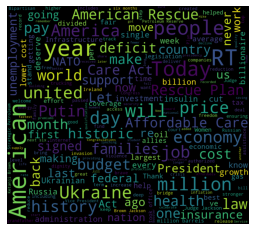

In [15]:
allw=' '.join([t for t in df['Tweets']])

#for wordcloud
wc=WordCloud(width=1000,height=900,random_state=20,max_font_size=100).generate(allw)
plt.imshow(wc)
plt.axis('off')

In [22]:
def subj(text):
  return TextBlob(text).sentiment.subjectivity
def polar(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Tweets'].apply(subj)
df['Polarity']=df['Tweets'].apply(polar)
df.head()

,Tweets,Subjectivity,Polarity
0,"To help deal with Putin’s Price Hike, I’ve aut...",0.200000,-0.075000
1,RT : Jill and I are praying for those injured...,0.393939,0.193182
2,America is back to work. Our economy added 7.9...,0.355000,0.007500
3,Today is a good day—a day that history is goin...,0.600000,0.700000
4,RT : Judge Jackson brings a rare combination ...,0.900000,0.300000


In [23]:
def wordscore(score):
  if score<0:
   return 'Negative'
  elif score==0:
   return 'Neutral'
  else:
    return 'Positive'
df['Results']=df['Polarity'].apply(wordscore)
df

,Tweets,Subjectivity,Polarity,Results
0,"To help deal with Putin’s Price Hike, I’ve aut...",0.200000,-0.075000,Negative
1,RT : Jill and I are praying for those injured...,0.393939,0.193182,Positive
2,America is back to work. Our economy added 7.9...,0.355000,0.007500,Positive
3,Today is a good day—a day that history is goin...,0.600000,0.700000,Positive
4,RT : Judge Jackson brings a rare combination ...,0.900000,0.300000,Positive
...,...,...,...,...
95,We're banning all imports of Russian oil and g...,0.250000,0.075000,Positive
96,"On International Women’s Day and every day, le...",0.293750,0.212500,Positive
97,The American Rescue Plan has resulted in histo...,0.066667,0.066667,Positive
98,It costs pharmaceutical companies $10 to make ...,0.000000,0.000000,Neutral


In [24]:
j=1
sorted=df.sort_values(by=['Polarity'])
for i in range(0,sorted.shape[0]):
  if(sorted['Results'][i]=='Positive'):
    print(str(j)+')'+sorted['Tweets'][i])
    print()
    j=j+1

1)RT  : Jill and I are praying for those injured in the New York City subway shooting. We are grateful for the first responders and civi…

2)America is back to work. Our economy added 7.9 million jobs since I took office—more jobs created on average per month than under any other president in history. That’s millions of families with a little more breathing room and the dignity a job provides.

3)Today is a good day—a day that history is going to remember.  

4)RT  : Judge Jackson brings a rare combination of experience and qualifications to the Court. A federal judge who served on the secon…

5)RT  : Today is a good day for America. A day that history will remember. Tune in as the Vice President, Judge Ketanji Brown Jackson, a…

6)Over the last four weeks, fewer Americans filed initial claims for unemployment insurance than any time in our nation’s recorded history. While we have more work to do to lower costs for families, today’s data demonstrates that America is on the move again.


In [25]:
j=1
sorted=df.sort_values(by=['Polarity'])
for i in range(0,sorted.shape[0]):
  if(sorted['Results'][i]=='Negative'):
    print(str(j)+')'+sorted['Tweets'][i])
    print()
    j=j+1

1)To help deal with Putin’s Price Hike, I’ve authorized the use of 1 million barrels per day on average for the next six months from our Strategic Petroleum Reserve—the largest release of our national reserve in history.

2)Over 31 million people now have health insurance through the Affordable Care Act.4 out of 5 Americans can find quality coverage for under $10 a month.The average family is saving $2,400 a year on their premiums.The Affordable Care Act is stronger now than it has ever been.

3)After a long stretch, Americans are back to work, and the economy has gone from being on the mend to being on the move.

4)In March, the unemployment rate fell to 3.6%, down from 6.4% when I took office about 15 months ago – the fastest decline in unemployment to start a president's term ever recorded.

5)RT  : I just signed the Emmett Till Antilynching Act into law — making lynching a federal hate crime for the first time in American hi…

6)My budget makes the investments needed to reduce cost

In [27]:
posit=df[df.Results=='Positive']
posit=posit['Tweets']
round((posit.shape[0]/df.shape[0])*100,1)

58.0

In [28]:
negit=df[df.Results=='Negative']
negit=negit['Tweets']
round((negit.shape[0]/df.shape[0])*100,1)

16.0

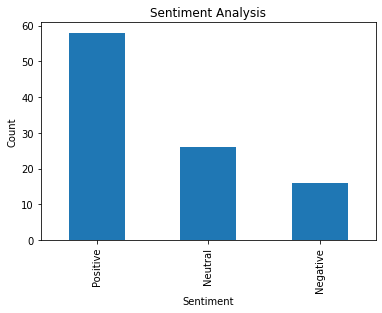

In [29]:
df['Results'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Results'].value_counts().plot(kind='bar')
plt.show()